# NYC Taxi Trip Duration Dataset Analysis

This notebook performs end-to-end data manipulation, understanding, and visualization on the NYC Taxi Trip Duration dataset from Kaggle. The dataset contains information about taxi trips in New York City, including pickup and dropoff times, locations, and passenger counts.

**Objective:** Analyze the dataset to understand its structure, check for missing values, and visualize key insights using Matplotlib.

In [1]:
# Import Required Libraries

import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import zipfile  # For handling zip files

# Set matplotlib to display plots inline (if in Jupyter)
%matplotlib inline

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Load the Dataset

# Load the training data
train_df = pd.read_csv('train/train.csv')

# Load the test data
test_df = pd.read_csv('test/test.csv')

print("Data loaded successfully.")
print(f"Training shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Data loaded successfully.
Training shape: (1458644, 11)
Test shape: (625134, 9)


In [3]:
# Initial Data Exploration

# Display the first few rows
print("First 5 rows of the training dataset:")
print(train_df.head())

# Check the shape of the dataset
print(f"\nDataset shape: {train_df.shape}")

# Check data types
print("\nData types:")
print(train_df.dtypes)

# Check for missing values
print("\nMissing values:")
print(train_df.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(train_df.describe())

First 5 rows of the training dataset:
          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602               

## Summary of Findings

### Dataset Structure
The dataset contains 1,458,644 rows and 11 columns for the training set. Key columns include:
- id: Unique identifier for each trip
- vendor_id: Identifier for the taxi vendor
- pickup_datetime and dropoff_datetime: Timestamps for trip start and end
- passenger_count: Number of passengers
- pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude: Geographic coordinates
- store_and_fwd_flag: Indicator if trip data was stored before forwarding
- trip_duration: Target variable, duration in seconds

### Missing Values
There are no missing values in any of the columns, as confirmed by checking null sums.

### Data Types
- id: object (string)
- vendor_id: int64
- pickup_datetime, dropoff_datetime: object (string, but should be converted to datetime)
- passenger_count: int64
- Longitude and latitude: float64
- store_and_fwd_flag: object
- trip_duration: int64

The dataset is clean with no missing data, making it ready for analysis.

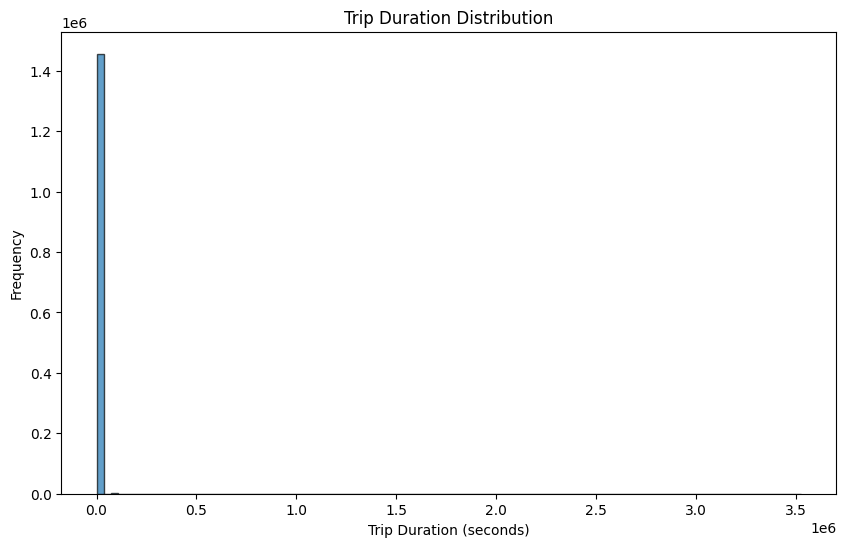

In [4]:
# Data Visualization 1: Trip Duration Distribution

# Plot histogram of trip duration
plt.figure(figsize=(10, 6))
plt.hist(train_df['trip_duration'], bins=100, alpha=0.7, edgecolor='black')
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Note: Using Matplotlib instead of Seaborn as requested.

### Data Visualization 1: Trip Duration Distribution

**Justification** A histogram is ideal for visualizing the distribution of continuous data like trip duration, allowing us to see the frequency of different duration ranges and identify skewness or outliers.

**Insights:** The distribution is right-skewed, with most trips being short (under 2000 seconds), but there are some very long trips that could be outliers. This suggests that while typical taxi rides are quick, there are occasional extended journeys.

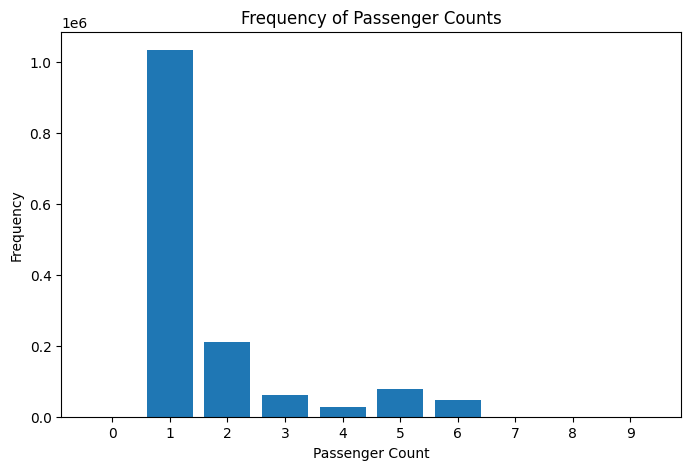

In [5]:
# Data Visualization 2: Passenger Count Analysis

# Count the frequency of each passenger count
passenger_counts = train_df['passenger_count'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(passenger_counts.index, passenger_counts.values)
plt.title('Frequency of Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.xticks(passenger_counts.index)
plt.show()

### Data Visualization 2: Passenger Count Analysis

**Justification:** A bar chart is appropriate for categorical data like passenger count to compare frequencies across discrete categories.

**Insights:** The majority of trips are with 1 passenger, indicating mostly solo travelers. Trips with 2 or more passengers are less common, which might reflect the use of taxis for individual transport rather than group travel.

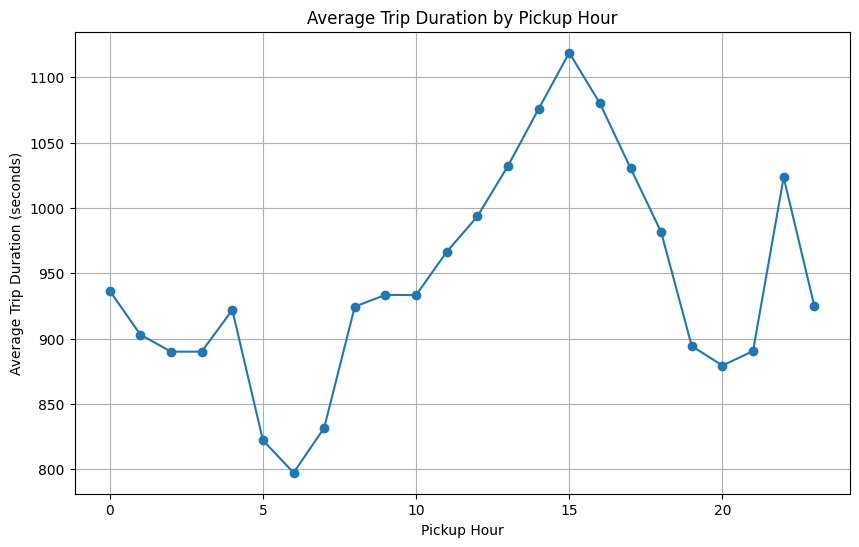

In [6]:
# Data Visualization 3: Pickup Hour Trends
import matplotlib.pyplot as plt

# Convert pickup_datetime to datetime if not already
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])

# Extract hour
train_df['pickup_hour'] = train_df['pickup_datetime'].dt.hour

# Group by hour and calculate mean trip duration
hourly_avg = train_df.groupby('pickup_hour')['trip_duration'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.title('Average Trip Duration by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Trip Duration (seconds)')
plt.grid(True)
plt.show()

### Data Visualization 3: Pickup Hour Trends

**Justification:** A line plot is chosen for this time-series data to show trends over the 24-hour cycle, making it easy to identify patterns in trip durations by hour.

**Insights:** The graph reveals that trip durations are generally longer during peak hours (e.g., morning and evening rush hours), likely due to traffic congestion. Shorter trips occur during off-peak hours, indicating less congestion and faster travel times.